In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import sqlite3
from scipy.stats import binned_statistic
import rubin_sim.maf as maf


In [2]:
bundleList = []
run_name = 'draft_connected_v2.99_10yrs'

notes = ['long', 'blob_long']
for note in notes:
    nside=64
    metric = maf.CountMetric(col='night')
    sql = 'note like "' + note + '%"'

    slicer = maf.HealpixSlicer(
            nside=nside,
            useCache=False)

    bundle = maf.MetricBundle(
                metric,
                slicer,
                sql, runName=run_name
            )
    bundleList.append(bundle)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


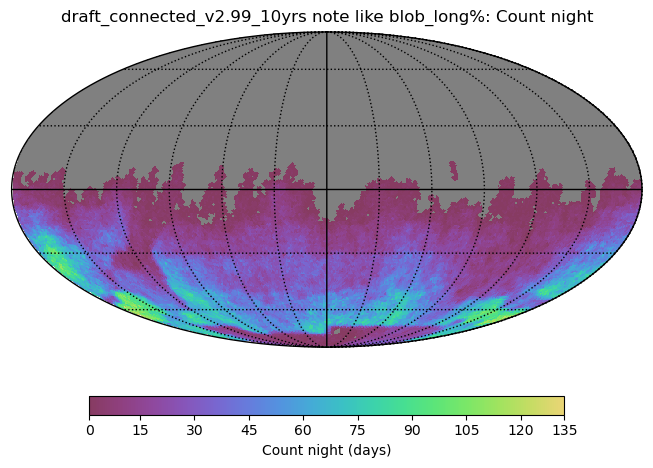

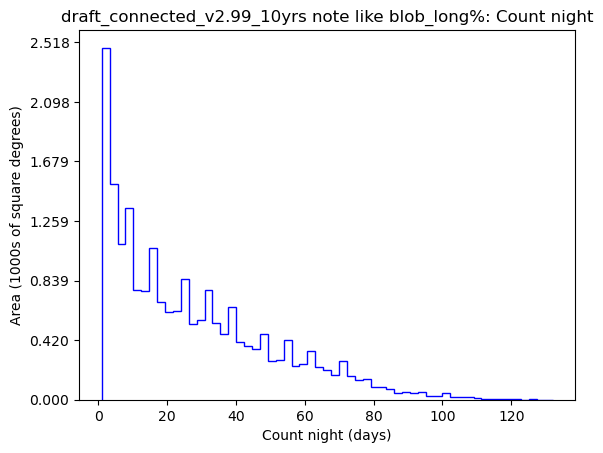

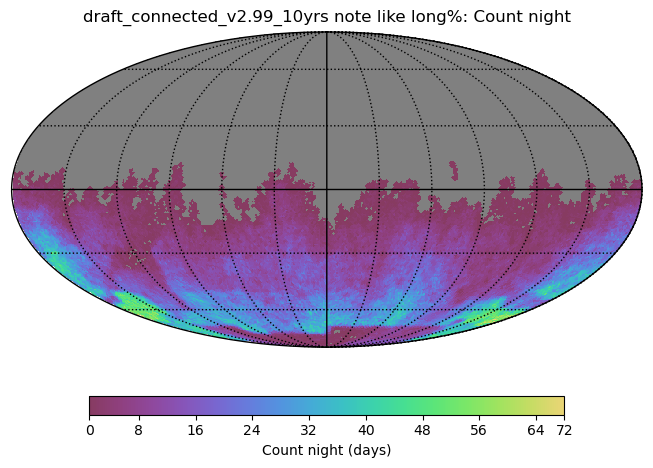

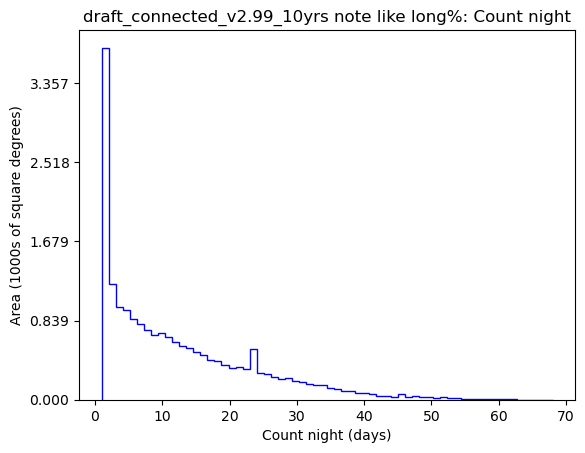

In [3]:
bg = maf.MetricBundleGroup(bundleList, 'draft_connected_v2.99_10yrs.db', 'temp', None)
bg.runAll()
bg.plotAll(closefigs=False)

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


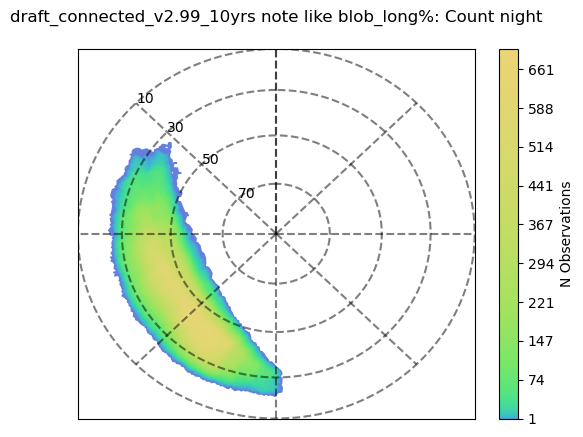

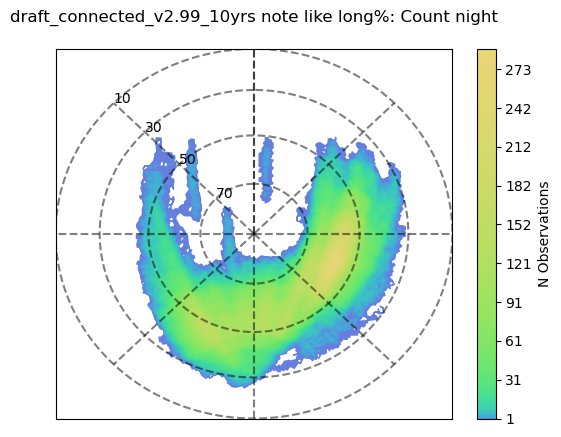

In [4]:
bundleList = []
run_name = 'draft_connected_v2.99_10yrs'
plotFuncs = [maf.plots.LambertSkyMap()]
plotDict = {"norm": "log",
           'xlabel': 'N Observations'}
notes = ['long', 'blob_long']
for note in notes:
    nside=64
    metric = maf.CountMetric(col='night')
    sql = 'note like "' + note + '%"'

    slicer = maf.HealpixSlicer(
            nside=nside,
            latCol='altitude',
            lonCol='azimuth',
            useCache=False)

    bundle = maf.MetricBundle(
                metric,
                slicer,
                sql, runName=run_name,
        plotDict=plotDict,
        plotFuncs=plotFuncs,
            )
    bundleList.append(bundle)
    
bg = maf.MetricBundleGroup(bundleList, 'draft_connected_v2.99_10yrs.db', 'temp', None)
bg.runAll()
bg.plotAll(closefigs=False)